In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


/Users/home/miniconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

mymean = 100

df = mymean

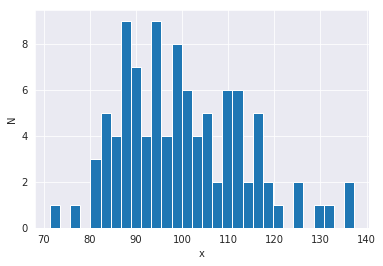

In [3]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456)
# prepare a container for all the distribution: 
# a dictionary so you can call each family of distribution by "key" 
mydists = {}
# mydists is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [4]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 100.09, standard deviation: 13.24


In [5]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


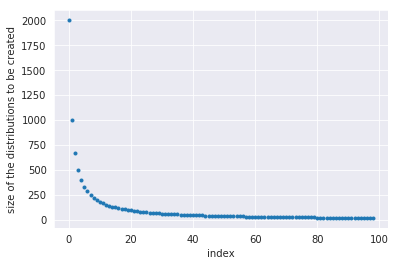

In [6]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

Text(1259.3999999999999, 100, 'expected mean')

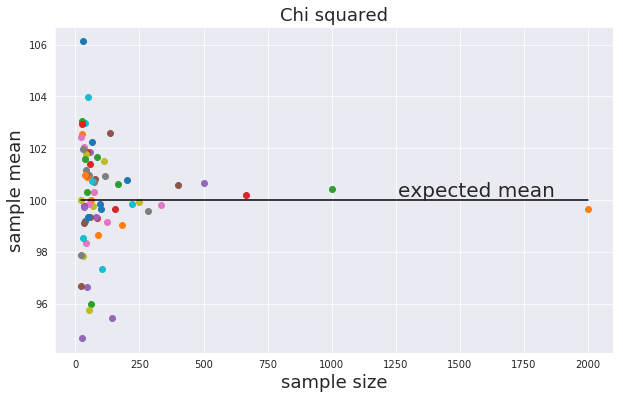

In [7]:
#fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100
    
# save the means for plotting later    

mydists['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

In [8]:
#Using the Law of Large Numbers, we can see that when our sample size increases, our standard error for the sample mean approaches 0,
#and we get closer to the expected mean, as well as the fact that our distribution closely resembles a normal distribution with a
#sharp peak.

Text(0, 0.5, 'N')

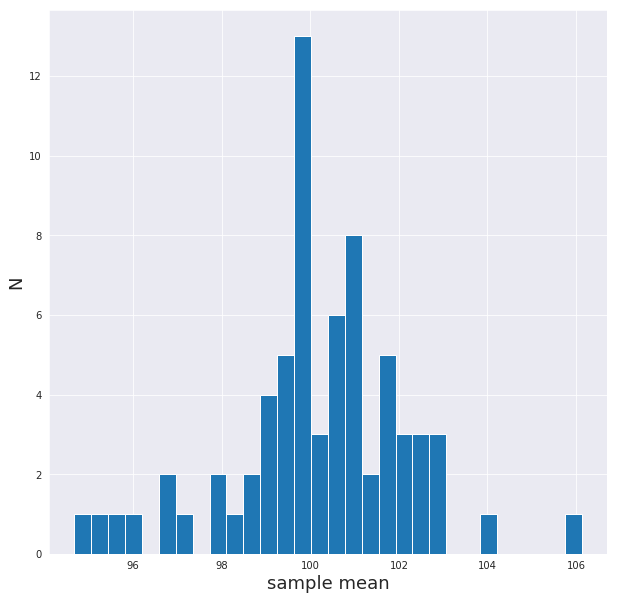

In [9]:
allmeans = list(mydists['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

In [10]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['pois']


mymean = 100

df = mymean

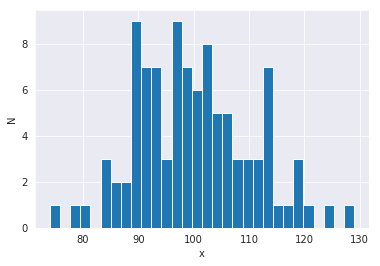

In [11]:
import numpy as np
np.random.seed(456)
# prepare a container for all the distribution: 
# a dictionary so you can call each family of distribution by "key" 
mydists = {}
# mydists is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['pois'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['pois'][100] = np.random.poisson(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['pois'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [12]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(mydists['pois'][100].mean(), mydists['pois'][100].std()))

Poisson mean: 99.90, standard deviation: 10.46


Text(1259.3999999999999, 100, 'expected mean')

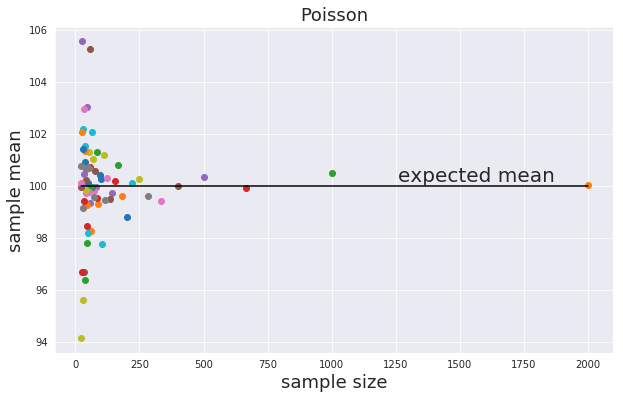

In [13]:

for n in mysize:
    mydists['pois'][n] = np.random.poisson(df, size = n) #all distributions have mean=df=100
    
# save the means for plotting later    

mydists['pois']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['pois']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['pois']['means'][nn] = mydists['pois'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['pois']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Poisson', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

In [14]:
#Here, the expected mean meets with our solution once we gett to 2000 samples.

Text(0, 0.5, 'N')

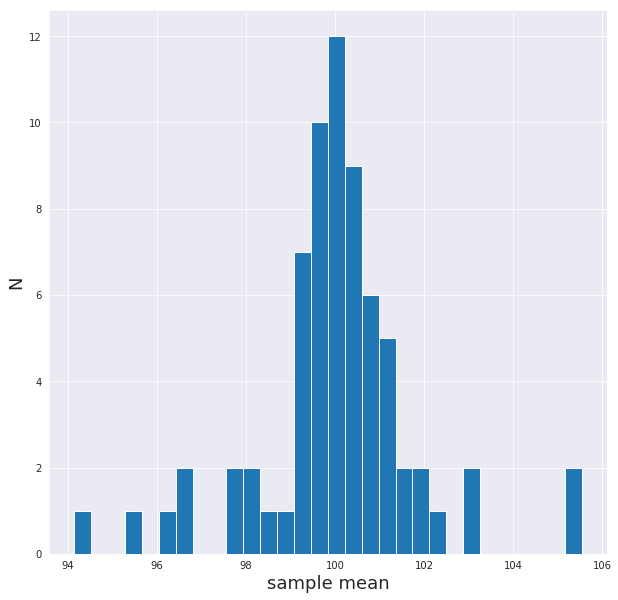

In [15]:
allmeans = list(mydists['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

In [16]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'norm', 'binomial']
distributions = ['norm']


mymean = 100

df = mymean

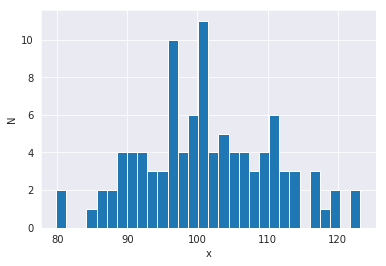

In [17]:
import numpy as np
np.random.seed(456)
# prepare a container for all the distribution: 
# a dictionary so you can call each family of distribution by "key" 
mydists = {}
# mydists is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['norm'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['norm'][100] = np.random.normal(100, 10, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['norm'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [18]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(mydists['norm'][100].mean(), mydists['norm'][100].std()))

Normal mean: 101.45, standard deviation: 9.20


Text(1259.3999999999999, 100, 'expected mean')

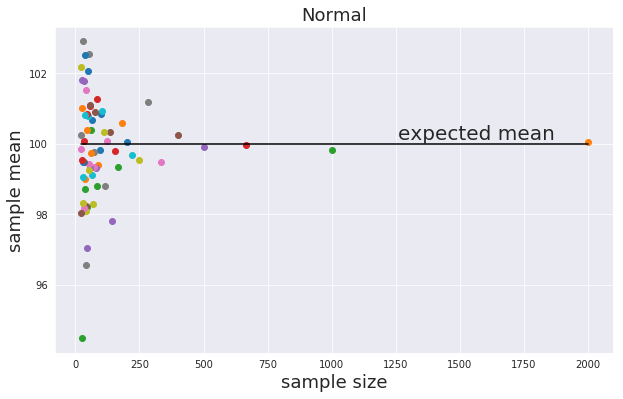

In [19]:
for n in mysize:
    mydists['norm'][n] = np.random.normal(100, 10, size = n) #all distributions have mean=df=100
    
# save the means for plotting later    

mydists['norm']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['norm']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['norm']['means'][nn] = mydists['norm'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['norm']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Normal', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

In [20]:
#Applying the central limit theorm holds in this case as well, 
#in the the expected mean gets closer to our solution with larger sample sizes

Text(0, 0.5, 'N')

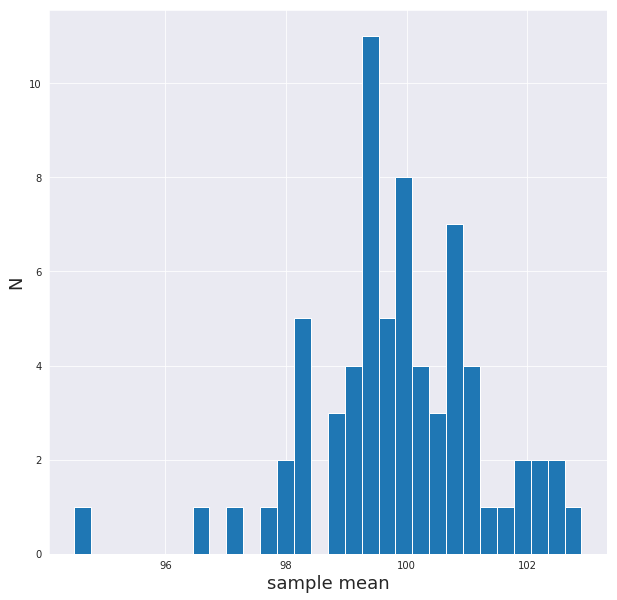

In [21]:
allmeans = list(mydists['norm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

In [22]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'norm', 'binomial']
distributions = ['binom']


mymean = 100

df = mymean

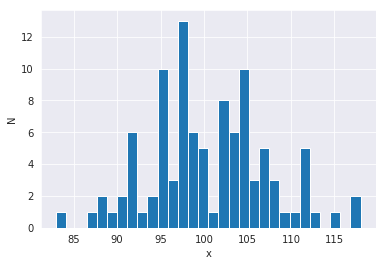

In [23]:
import numpy as np
np.random.seed(456)
# prepare a container for all the distribution: 
# a dictionary so you can call each family of distribution by "key" 
mydists = {}
# mydists is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['binom'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['binom'][100] = np.random.binomial(200, 0.5, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['binom'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

Text(1259.3999999999999, 100, 'expected mean')

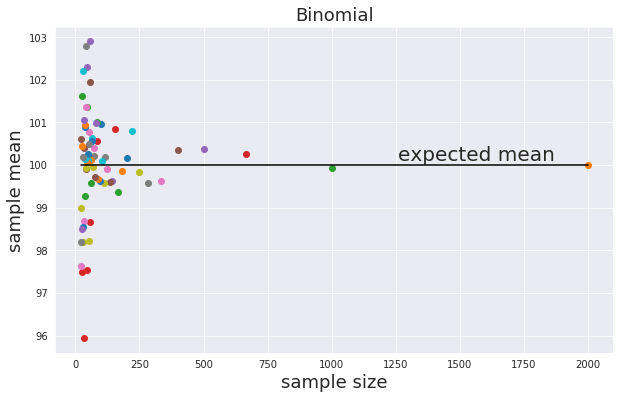

In [24]:
for n in mysize:
    mydists['binom'][n] = np.random.binomial(200, 0.5, size = n) #all distributions have mean=df=100
    
# save the means for plotting later    

mydists['binom']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['binom']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['binom']['means'][nn] = mydists['binom'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['binom']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Binomial', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

In [25]:
#The central limit theorem is displayed here in that our solution meets with the expected mean with a smaller standard deviation
#the larger our sample size gets

Text(0, 0.5, 'N')

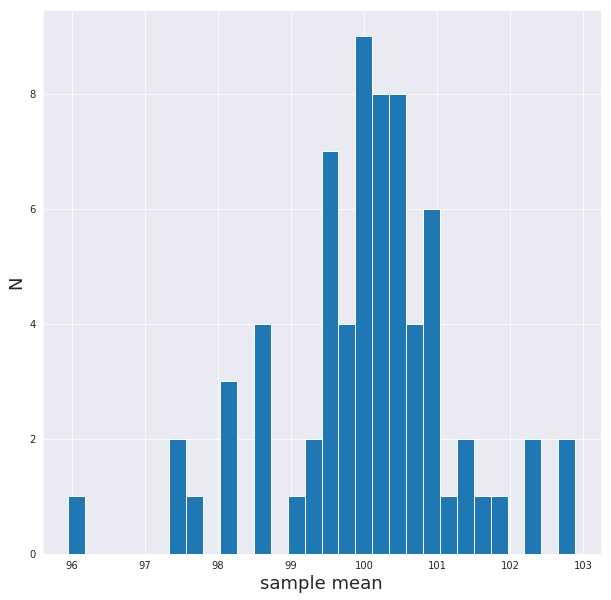

In [26]:
allmeans = list(mydists['binom']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

In [27]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['laplace']


mymean = 100

df = mymean

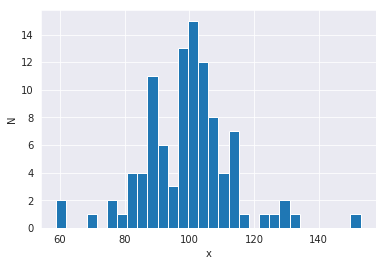

In [28]:
import numpy as np
np.random.seed(456)
# prepare a container for all the distribution: 
# a dictionary so you can call each family of distribution by "key" 
mydists = {}
# mydists is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['laplace'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['laplace'][100] = np.random.laplace(100, 10, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it: 
#             an array of 100 elements by the key 100
pl.hist(mydists['laplace'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [29]:
#Error from running this cell.
#for n in mysize:
#    mydists['laplace'][n] = np.random.laplace(100, 10, size = n) #all distributions have mean=df=100
    
# save the means for plotting later    

#mydists['laplace']['laplace'] = {}
# prepare the figure
#axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

#for nn in mydists['laplace']:
#    if not type(nn) == str: # needed because one element is "mean"
#        mydists['laplace']['mean'][nn] = mydists['laplace'][nn].mean()
        #and plot it
 #       axchisq_mu_n.plot(nn, mydists['laplace']['means'][nn], 'o')
 #       axchisq_mu_n.set_xlabel('sample size', fontsize=18)
  #      axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
#axchisq_mu_n.set_title('Laplace', fontsize=18)
#axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
#axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
 #                 va="bottom", fontsize=20)

---

<h1 style="color:red"> please add caption to all figures, describe what you see and how it relates to the law of large numbers</h1>
